In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch
# from GEH_LOSS import GEH_loss
import geh as ga

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import relative_accuracy as ra

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5_multi.npz")['x'] 
Output_train_5 = np.load("Deep_train_5_multi.npz")['y']

Deep_test_5   = np.load("Deep_test_5_multi.npz")['x'] 
Output_test_5 = np.load("Deep_test_5_multi.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15_multi.npz")['x'] 
Output_train_15 = np.load("Deep_train_15_multi.npz")['y']

Deep_test_15   = np.load("Deep_test_15_multi.npz")['x'] 
Output_test_15 = np.load("Deep_test_15_multi.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30_multi.npz")['x'] 
Output_train_30 = np.load("Deep_train_30_multi.npz")['y']

Deep_test_30   = np.load("Deep_test_30_multi.npz")['x'] 
Output_test_30 = np.load("Deep_test_30_multi.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60_multi.npz")['x'] 
Output_train_60 = np.load("Deep_train_60_multi.npz")['y']

Deep_test_60   = np.load("Deep_test_60_multi.npz")['x'] 
Output_test_60 = np.load("Deep_test_60_multi.npz")['y']

In [6]:
# Wide Data
Xtrain = joblib.load("002weeks_train_Multi.save") 
Xtest = joblib.load("002weeks_test_Multi.save") 

In [7]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

In [8]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

In [9]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

In [10]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

In [11]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

In [12]:
# Wide Day Data
Xtest_week = joblib.load("002weeks_test.save") 
Xtest_day = joblib.load("002days_test.save") 

Wide_test_5_week = np.delete(Xtest_week, np.s_[0:15], 0)
Wide_test_5_day = np.delete(Xtest_day, np.s_[0:15], 0)

Wide_test_15_week = np.delete(Xtest_week, np.s_[0:17], 0)
Wide_test_15_day = np.delete(Xtest_day, np.s_[0:17], 0)

Wide_test_30_week = np.delete(Xtest_week, np.s_[0:20], 0)
Wide_test_30_day = np.delete(Xtest_day, np.s_[0:20], 0)

Wide_test_60_week = np.delete(Xtest_week, np.s_[0:26], 0)
Wide_test_60_day = np.delete(Xtest_day, np.s_[0:26], 0)

In [13]:
Test      = pd.read_csv('01test_scaled.csv', index_col=None, parse_dates=[0])

In [14]:
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# from matplotlib import ticker
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True) 
# formatter.set_powerlimits((-1,1)) 
# plt.rc('font', size=30)

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [15]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 6                # No of loop detectors
n_seq = 3                     # Subsequences
n_steps = 5                   # time-step per subsequence
# val_percent = 0.07567       # 2 weeks
val_percent = 0.2        
batch_size = 32

n_seq_ = 3                     # Subsequences
n_steps_ = 3                   # time-step per subsequence

#### 5 mins

In [16]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = scaler.inverse_transform(Output_train_5)

In [17]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = scaler.inverse_transform(Output_test_5)

#### 15 mins

In [18]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = scaler.inverse_transform(Output_train_15)

In [19]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = scaler.inverse_transform(Output_test_15)

#### 30 mins

In [20]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = scaler.inverse_transform(Output_train_30)

In [21]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = scaler.inverse_transform(Output_test_30)

#### 60 mins

In [22]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = scaler.inverse_transform(Output_train_60)

In [23]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = scaler.inverse_transform(Output_test_60)

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [24]:
# define no_of_channels
n_channels = 1

In [25]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [26]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

In [27]:
# Train data
Wt5  =  Wt5.reshape(Wt5.shape[0], n_seq_, n_steps_, n_features)
Wt15 =  Wt15.reshape(Wt15.shape[0], n_seq_, n_steps_, n_features)
Wt30 =  Wt30.reshape(Wt30.shape[0], n_seq_, n_steps_, n_features)
Wt60 =  Wt60.reshape(Wt60.shape[0], n_seq_, n_steps_, n_features)

# Validation data
Wv5  =  Wv5.reshape(Wv5.shape[0], n_seq_, n_steps_, n_features)
Wv15 =  Wv15.reshape(Wv15.shape[0], n_seq_, n_steps_, n_features)
Wv30 =  Wv30.reshape(Wv30.shape[0], n_seq_, n_steps_, n_features)
Wv60 =  Wv60.reshape(Wv60.shape[0], n_seq_, n_steps_, n_features)

In [28]:
Wide_test_5_week = np.expand_dims(Wide_test_5_week, 1)
Wide_test_15_week = np.expand_dims(Wide_test_15_week, 1)
Wide_test_30_week = np.expand_dims(Wide_test_30_week, 1)
Wide_test_60_week = np.expand_dims(Wide_test_60_week, 1)

Wide_test_5_day = np.expand_dims(Wide_test_5_day, 1)
Wide_test_15_day = np.expand_dims(Wide_test_15_day, 1)
Wide_test_30_day = np.expand_dims(Wide_test_30_day, 1)
Wide_test_60_day = np.expand_dims(Wide_test_60_day, 1)

In [29]:
Wv5w  = Wide_test_5_week
Wv15w = Wide_test_15_week
Wv30w = Wide_test_30_week
Wv60w = Wide_test_60_week

Wv5x  = Wide_test_5_day
Wv15x = Wide_test_15_day
Wv30x = Wide_test_30_day
Wv60x = Wide_test_60_day

In [30]:
Xt5.shape

(49233, 3, 5, 6, 1)

In [31]:
Wt5.shape

(49233, 3, 3, 6)

# CNN-LSTM model

In [32]:
from tensorflow import keras
from keras_self_attention import SeqSelfAttention

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights = True)

In [33]:
Wide_train_5.shape

(49233, 9, 6)

# 5 mins ahead

In [34]:
model5 = keras.models.load_model("my_dir/8a-5") 

In [35]:
model5_At_Conv_LSTM = keras.models.load_model("my_dir/6ai-Conv-LSTM-5") 

In [36]:
model5.predict((Wv5,Xv5))

array([[ 29.914661 ,  18.791624 ,  24.836315 ,  75.23582  ,  34.08109  ,
          5.342314 ],
       [ 29.12519  ,  16.384912 ,  23.3795   ,  73.66425  ,  32.036816 ,
          6.4321337],
       [ 29.805801 ,  17.7312   ,  21.399952 ,  71.09582  ,  32.1066   ,
          3.5656495],
       ...,
       [ 42.24743  ,  41.425064 ,  56.395412 , 114.05434  ,  52.944767 ,
         12.665799 ],
       [ 41.2009   ,  35.409634 ,  48.264465 , 101.53913  ,  47.129646 ,
         12.5476   ],
       [ 41.490868 ,  36.421017 ,  46.603302 ,  99.02628  ,  45.667614 ,
          7.4409575]], dtype=float32)

In [37]:
Wv5w.shape

(4017, 1, 14)

In [38]:
model5_At_Conv_LSTM.predict((Wv5w, Wv5x, Xv5))

array([[ 30.566442 ,  18.472126 ,  26.520266 ,  76.057465 ,  32.04153  ,
          4.4170194],
       [ 30.91039  ,  18.199957 ,  26.264944 ,  78.06238  ,  33.420174 ,
          4.591796 ],
       [ 30.561365 ,  17.439259 ,  24.886015 ,  72.12782  ,  30.644297 ,
          4.0479846],
       ...,
       [ 41.111897 ,  41.535217 ,  50.47345  , 103.87294  ,  47.822456 ,
         12.976104 ],
       [ 41.420677 ,  40.818947 ,  49.59189  , 100.41373  ,  46.35575  ,
         15.370644 ],
       [ 40.217384 ,  39.902344 ,  53.78541  , 103.26345  ,  46.85074  ,
         14.696504 ]], dtype=float32)

### Evaluation on inverse_transform

In [39]:
test_predictions5 = model5.predict((Wv5,Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5)

MAE5 = mean_absolute_error(yv5,test_predictions5)

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

eval5 = [MAE5, RMSE5, MAPE5]
print(eval5)

test_predictions5 = model5_At_Conv_LSTM.predict((Wv5w, Wv5x, Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5)

MAE5 = mean_absolute_error(yv5,test_predictions5)

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

eval5a = [MAE5, RMSE5, MAPE5]
print(eval5a)

[14.05587607056846, 19.985919245562627, 14.73871163031716]
[13.618255839561705, 19.352964848602294, 14.032712058655447]


In [40]:
test_predictions5 = model5.predict((Wv5,Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5, multioutput='raw_values')

MAE5 = mean_absolute_error(yv5,test_predictions5, multioutput='raw_values')

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5, multioutput='raw_values')*100

eval5 = [MAE5, RMSE5, MAPE5]
print(eval5)

[array([ 7.88702914, 11.54332864, 17.93603809, 20.76948651, 12.65360144,
       13.54577261]), array([10.72678002, 15.67971741, 24.41245553, 28.06738568, 16.89747496,
       19.14245744]), array([ 8.55850015, 11.60230171, 14.55143003, 10.27735206, 14.21132803,
       29.2313578 ])]


In [41]:
test_predictions5 = model5_At_Conv_LSTM.predict((Wv5w, Wv5x, Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5, multioutput='raw_values')

MAE5 = mean_absolute_error(yv5,test_predictions5, multioutput='raw_values')

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5, multioutput='raw_values')*100

eval5a = [MAE5, RMSE5, MAPE5]
print(eval5a)

[array([ 7.85050248, 11.57751562, 17.26196678, 20.09777124, 11.97011892,
       12.95166   ]), array([10.75371269, 15.67397664, 23.37431657, 27.23927505, 16.05080656,
       18.437528  ]), array([ 8.44849443, 11.54490612, 14.05897269,  9.83501733, 13.4871379 ,
       26.82174389])]


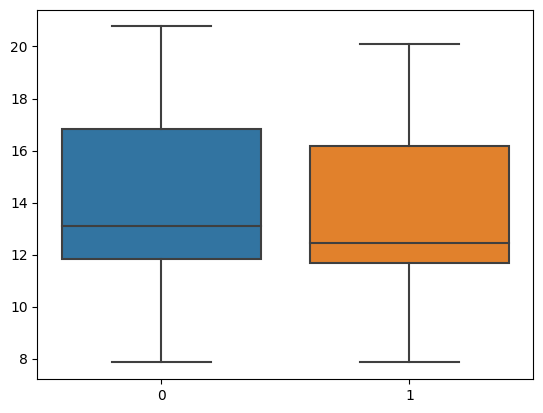

In [42]:
ax = sns.boxplot(data=[eval5[0],eval5a[0]])

# 15 mins ahead

In [43]:
model15 = keras.models.load_model("my_dir/8a-15")

In [44]:
model15_At_Conv_LSTM = keras.models.load_model("my_dir/6ai-Conv-LSTM-15") 

In [45]:
model15.predict((Wv15,Xv15))

array([[ 32.367676 ,  22.384737 ,  28.886654 ,  74.6526   ,  30.039087 ,
          3.0251918],
       [ 30.593832 ,  19.779675 ,  27.938778 ,  75.04236  ,  30.473522 ,
          3.4109426],
       [ 30.097658 ,  18.485462 ,  24.937206 ,  71.6802   ,  28.940048 ,
          2.764037 ],
       ...,
       [ 46.98329  ,  47.46642  ,  61.264767 , 116.85552  ,  52.632145 ,
         11.910158 ],
       [ 43.497044 ,  41.960136 ,  56.939796 , 112.149086 ,  50.962334 ,
         15.604168 ],
       [ 40.357895 ,  36.858894 ,  48.12519  , 104.40556  ,  45.399693 ,
         15.1380825]], dtype=float32)

In [46]:
model15_At_Conv_LSTM.predict((Wv15w, Wv15x, Xv15))

array([[ 30.91549 ,  20.382683,  19.58915 ,  66.91817 ,  27.45938 ,
          5.604291],
       [ 30.807467,  20.06128 ,  18.0526  ,  67.469444,  28.698692,
          7.74488 ],
       [ 30.813248,  19.312992,  15.918254,  65.70153 ,  27.950373,
          7.260421],
       ...,
       [ 45.33571 ,  46.97687 ,  62.511482, 117.00412 ,  54.560585,
         20.655788],
       [ 44.624924,  45.707584,  59.56117 , 113.42606 ,  53.759254,
         24.91065 ],
       [ 43.162926,  43.473484,  53.04815 , 109.0426  ,  54.34869 ,
         24.800922]], dtype=float32)

### Evaluation on inverse_transform

In [47]:
test_predictions15 = model15.predict((Wv15,Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15)

MAE15 = mean_absolute_error(yv15,test_predictions15)

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

eval15 = [MAE15, RMSE15, MAPE15]
print(eval15)


test_predictions15 = model15_At_Conv_LSTM.predict((Wv15w, Wv15x, Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15)

MAE15 = mean_absolute_error(yv15,test_predictions15)

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

eval15a = [MAE15, RMSE15, MAPE15]
print(eval15a)

[14.524150289861728, 20.609374135127542, 16.104556414568826]
[15.709626669075142, 22.363305179164545, 18.46696245937817]


In [48]:
test_predictions15 = model15.predict((Wv15,Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15, multioutput='raw_values')

MAE15 = mean_absolute_error(yv15,test_predictions15, multioutput='raw_values')

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15, multioutput='raw_values')*100

eval15 = [MAE15, RMSE15, MAPE15]
print(eval15)

[array([ 8.41041999, 12.262018  , 18.0680762 , 21.12740816, 12.74297252,
       14.53400688]), array([11.46471792, 16.67127606, 24.52948204, 28.61501624, 17.06549605,
       20.67270693]), array([ 9.11145417, 12.25505847, 14.69213462, 10.41355759, 14.51794008,
       35.63719355])]


In [49]:
test_predictions15 = model15_At_Conv_LSTM.predict((Wv15w, Wv15x, Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15, multioutput='raw_values')

MAE15 = mean_absolute_error(yv15,test_predictions15, multioutput='raw_values')

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15, multioutput='raw_values')*100

eval15a = [MAE15, RMSE15, MAPE15]
print(eval15a)

[array([ 8.97121486, 13.17989927, 19.78871272, 22.89279579, 13.67103411,
       15.75410326]), array([12.34820689, 17.82739675, 26.81610299, 31.23180845, 18.595289  ,
       22.13811671]), array([ 9.67154271, 13.64113284, 16.42870457, 11.35163893, 15.50863701,
       44.20011869])]


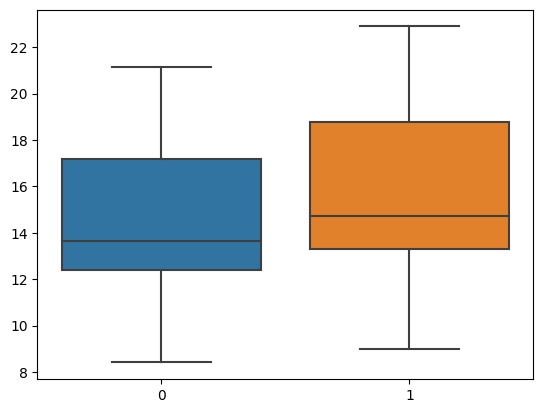

In [50]:
ax = sns.boxplot(data=[eval15[0],eval15a[0]])

# 30 mins ahead

In [51]:
model30 = keras.models.load_model("my_dir/8a-30")

In [52]:
model30_At_Conv_LSTM = keras.models.load_model("my_dir/6ai-Conv-LSTM-30") 

In [53]:
model30.predict((Wv30,Xv30))

array([[ 27.063957 ,  14.056344 ,  18.44636  ,  61.508213 ,  28.05753  ,
          3.6623204],
       [ 26.756945 ,  13.901027 ,  14.450296 ,  58.636425 ,  24.64436  ,
          3.6292756],
       [ 28.447773 ,  15.785947 ,  18.18933  ,  62.540684 ,  29.64607  ,
          4.255057 ],
       ...,
       [ 47.318848 ,  45.66744  ,  55.05055  , 115.60721  ,  52.30607  ,
          8.893443 ],
       [ 51.467876 ,  51.569767 ,  64.25343  , 120.99522  ,  57.652077 ,
         18.639769 ],
       [ 49.009396 ,  48.476727 ,  57.220127 , 111.82519  ,  54.490025 ,
         14.696287 ]], dtype=float32)

In [54]:
model30_At_Conv_LSTM.predict((Wv30w, Wv30x, Xv30))

array([[ 28.363708 ,  13.881653 ,  10.823496 ,  55.71536  ,  22.814173 ,
          3.6711807],
       [ 28.292492 ,  13.10416  ,  11.967885 ,  53.960854 ,  22.733667 ,
          2.9356365],
       [ 27.298353 ,  11.451976 ,  10.237626 ,  51.226234 ,  21.769785 ,
          1.5266728],
       ...,
       [ 41.732967 ,  40.30352  ,  53.30249  , 114.12805  ,  53.944138 ,
         20.61045  ],
       [ 39.86137  ,  38.50787  ,  49.12318  , 106.81025  ,  52.18516  ,
         15.901735 ],
       [ 38.731308 ,  37.422844 ,  54.18901  , 105.6326   ,  47.8277   ,
         15.014397 ]], dtype=float32)

### Evaluation on inverse_transform

In [55]:
test_predictions30 = model30.predict((Wv30,Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30)

MAE30 = mean_absolute_error(yv30,test_predictions30)

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

eval30 = [MAE30, RMSE30, MAPE30]
print(eval30)


test_predictions30 = model30_At_Conv_LSTM.predict((Wv30w, Wv30x, Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30)

MAE30 = mean_absolute_error(yv30,test_predictions30)

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

eval30a = [MAE30, RMSE30, MAPE30]
print(eval30a)

[16.52625573202646, 23.524523205448848, 17.8670905489843]
[16.793780166005806, 23.743173428259638, 19.333504373655597]


In [56]:
test_predictions30 = model30.predict((Wv30,Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30, multioutput='raw_values')

MAE30 = mean_absolute_error(yv30,test_predictions30, multioutput='raw_values')

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30, multioutput='raw_values')*100

eval30 = [MAE30, RMSE30, MAPE30]
print(eval30)

[array([ 9.40369793, 13.63787912, 20.56201573, 24.10548439, 14.79237651,
       16.65608071]), array([12.72173413, 18.46557919, 28.06655608, 32.94000166, 20.00520703,
       23.33699703]), array([10.24318929, 13.43984815, 17.0344264 , 11.4799697 , 16.01874587,
       38.98636389])]


In [57]:
test_predictions30 = model30_At_Conv_LSTM.predict((Wv30w, Wv30x, Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30, multioutput='raw_values')

MAE30 = mean_absolute_error(yv30,test_predictions30, multioutput='raw_values')

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30, multioutput='raw_values')*100

eval30a = [MAE30, RMSE30, MAPE30]
print(eval30a)

[array([ 9.76242316, 14.42814781, 21.24927218, 24.12336917, 14.47798555,
       16.72148313]), array([13.43557097, 19.48989072, 27.95445597, 32.88472056, 19.67304111,
       23.92016509]), array([10.39005448, 14.26179125, 18.80648126, 11.63387035, 15.9764777 ,
       44.93235121])]


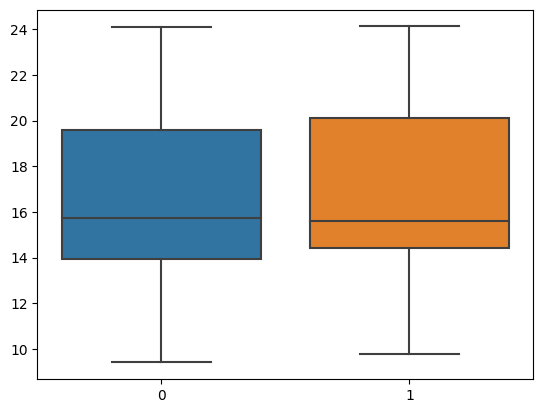

In [58]:
ax = sns.boxplot(data=[eval30[0],eval30a[0]])

# 60 mins ahead

In [59]:
model60 = keras.models.load_model("my_dir/8a-60")

In [60]:
model60_At_Conv_LSTM = keras.models.load_model("my_dir/6ai-Conv-LSTM-60")

In [61]:
model60.predict((Wv60,Xv60))

array([[ 30.127056 ,  16.127228 ,  17.567549 ,  61.868767 ,  29.797718 ,
          5.241587 ],
       [ 29.455692 ,  15.395087 ,  12.677343 ,  57.061455 ,  28.175407 ,
          2.2355547],
       [ 29.139164 ,  14.742309 ,  13.474688 ,  57.60087  ,  28.59797  ,
          3.1858802],
       ...,
       [ 38.213573 ,  38.490807 ,  66.37027  , 130.71269  ,  58.34733  ,
         22.452633 ],
       [ 40.02099  ,  38.153847 ,  56.70035  , 121.61234  ,  49.56161  ,
         11.933891 ],
       [ 38.556087 ,  34.044617 ,  48.519775 , 110.35028  ,  44.35517  ,
          7.9856887]], dtype=float32)

In [62]:
model60_At_Conv_LSTM.predict((Wv60w, Wv60x, Xv60))

array([[ 28.278856 ,  12.364385 ,  10.276212 ,  56.546448 ,  29.607153 ,
          2.777779 ],
       [ 27.70048  ,  11.601729 ,   8.453706 ,  55.801285 ,  30.14507  ,
          2.695763 ],
       [ 28.817532 ,  13.362411 ,   9.871709 ,  58.612686 ,  30.107584 ,
          3.957344 ],
       ...,
       [ 41.079998 ,  37.90377  ,  51.2606   , 113.99452  ,  49.888054 ,
         13.142105 ],
       [ 40.8698   ,  38.288788 ,  45.23124  , 115.357704 ,  52.444477 ,
          8.709    ],
       [ 41.643337 ,  38.14306  ,  52.060688 , 111.213806 ,  48.168068 ,
          6.9562774]], dtype=float32)

### Evaluation on inverse_transform

In [63]:
test_predictions60 = model60.predict((Wv60,Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60)

MAE60 = mean_absolute_error(yv60,test_predictions60)

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

eval60 = [MAE60, RMSE60, MAPE60]
print(eval60)


test_predictions60 = model60_At_Conv_LSTM.predict((Wv60w, Wv60x, Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60)

MAE60 = mean_absolute_error(yv60,test_predictions60)

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

eval60a = [MAE60, RMSE60, MAPE60]
print(eval60a)

[17.652301584140897, 25.055063966800983, 19.368627629541045]
[18.324573412925353, 26.03247498807579, 20.64197460860164]


In [64]:
test_predictions60 = model60.predict((Wv60,Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60, multioutput='raw_values')

MAE60 = mean_absolute_error(yv60,test_predictions60, multioutput='raw_values')

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60, multioutput='raw_values')*100

eval60 = [MAE60, RMSE60, MAPE60]
print(eval60)

[array([ 9.95706212, 14.45145229, 21.8969772 , 25.60613588, 15.67937194,
       18.32281008]), array([13.59718464, 19.62857846, 29.70245291, 34.70613623, 21.14582521,
       25.73859622]), array([10.63909141, 13.91727528, 17.79161988, 12.28844404, 17.21166448,
       44.3636707 ])]


In [65]:
test_predictions60 = model60_At_Conv_LSTM.predict((Wv60w, Wv60x, Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60, multioutput='raw_values')

MAE60 = mean_absolute_error(yv60,test_predictions60, multioutput='raw_values')

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60, multioutput='raw_values')*100

eval60a = [MAE60, RMSE60, MAPE60]
print(eval60a)

[array([10.44602031, 15.58168082, 23.74446213, 26.22607513, 15.72205941,
       18.22714267]), array([14.4069303 , 21.10730381, 31.26520215, 35.99885128, 21.43402405,
       26.0808946 ]), array([11.15909167, 14.96303748, 21.57651371, 12.71776184, 17.64466994,
       45.79077301])]


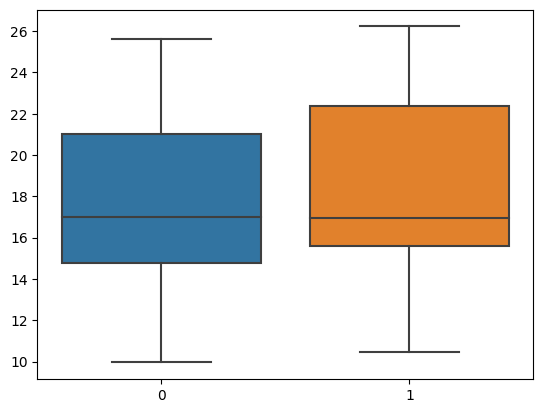

In [66]:
ax = sns.boxplot(data=[eval60[0],eval60a[0]])

# RESULTS

## General results

In [ ]:
l = ['MAE','RMSE','MAPE','Horizon']

In [ ]:
eval5.append(5)
eval15.append(15)
eval30.append(30)
eval60.append(60)

In [ ]:
df = pd.DataFrame(np.array([eval5,eval15,eval30,eval60]),columns=l)
df.set_index('Horizon')